In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [3]:
data = pd.read_csv("/content/drive/MyDrive/cac40.csv", index_col = 'Date', parse_dates = True)

<ipython-input-3-4ff2f99ce6d3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("/content/drive/MyDrive/cac40.csv", index_col = 'Date', parse_dates = True)


In [4]:
data.head(5)

,Open,High,Low,Close,Turnover
Date,,,,,
2000-03-01,6024.38,6102.12,5901.77,5917.37,-
2000-04-01,5922.23,5925.07,5657.20,5672.02,-
2000-05-01,5521.83,5589.50,5461.59,5479.70,-
2000-06-01,5485.93,5530.26,5388.85,5450.11,-
2000-07-01,5423.88,5561.69,5423.88,5539.61,-


array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

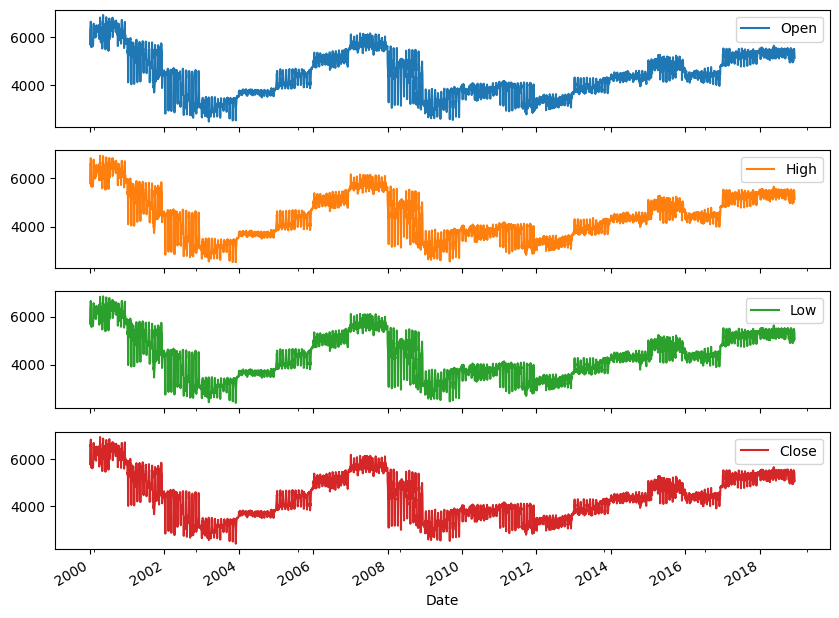

In [5]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [6]:
len = data.shape[0]
end = int(0.8 * len)
len

4841

In [7]:
newdata = data.iloc[:, 0]

In [8]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [9]:
T = 10

In [10]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [11]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3872, 10, 1) (3872, 1) (969, 10, 1) (969, 1)


In [13]:
N = X_train.shape[2]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

In [14]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [15]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [16]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
121/121 [==============================] - 10s 25ms/step - loss: 164351.2500 - accuracy: 0.0000e+00
Epoch 2/50
121/121 [==============================] - 3s 26ms/step - loss: 16727.1953 - accuracy: 0.0000e+00
Epoch 3/50
121/121 [==============================] - 2s 20ms/step - loss: 15363.9219 - accuracy: 0.0000e+00
Epoch 4/50
121/121 [==============================] - 2s 20ms/step - loss: 18191.2930 - accuracy: 0.0000e+00
Epoch 5/50
121/121 [==============================] - 2s 20ms/step - loss: 16962.2422 - accuracy: 0.0000e+00
Epoch 6/50
121/121 [==============================] - 3s 22ms/step - loss: 13454.8936 - accuracy: 0.0000e+00
Epoch 7/50
121/121 [==============================] - 4s 29ms/step - loss: 12549.8711 - accuracy: 0.0000e+00
Epoch 8/50
121/121 [==============================] - 2s 20ms/step - loss: 10798.0117 - accuracy: 0.0000e+00
Epoch 9/50
121/121 [==============================] - 2s 19ms/step - loss: 12533.8174 - accuracy: 0.0000e+00
Epoch 10/50
121/1

In [17]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

31/31 [==============================] - 0s 5ms/step
[4737.225] [4865.68]
[4756.058] [4885.]
[4774.2705] [4884.89]
[4801.0884] [4905.77]
[4812.6772] [4937.43]
[4829.0137] [4922.43]
[4857.042] [4882.94]
[4871.642] [4929.04]
[4894.177] [4953.68]
[4911.1504] [4940.64]
[4918.3994] [4930.06]
[4926.022] [4900.37]
[4813.2505] [4990.96]
[4943.883] [4997.94]
[4951.443] [5019.02]
[4951.3745] [5065.62]
[4958.5327] [5032.18]
[4976.0044] [5029.97]
[4982.633] [5044.42]
[4987.9243] [5078.25]
[4998.6494] [5040.86]
[5016.443] [5073.28]
[5044.696] [4992.55]
[4843.7974] [5020.09]
[4884.631] [5052.25]
[5054.7686] [5073.99]
[5064.373] [5009.63]
[4867.515] [5068.06]
[5069.2275] [5106.36]
[5072.785] [5146.78]
[5069.406] [5156.16]
[5071.997] [5224.22]
[5072.163] [5236.11]
[5093.286] [5252.48]
[5112.32] [5230.98]
[5124.95] [5246.75]
[5139.565] [5214.33]
[5173.083] [5154.91]
[4991.069] [5205.1]
[5185.621] [5210.7]
[5197.0776] [5217.08]
[5192.173] [5202.63]
[5096.6313] [5198.79]
[5086.1724] [5256.79]
[5239.4326]

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(predict_x, y_test)

0.9347546260005587

In [20]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [21]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,4865.68,4737.225098
1,4885.00,4756.058105
2,4884.89,4774.270508
3,4905.77,4801.088379
4,4937.43,4812.677246
...,...,...
964,4998.14,4867.416504
965,5026.66,4945.075684
966,5016.45,5025.323242
967,5112.58,5005.810547


<Axes: >

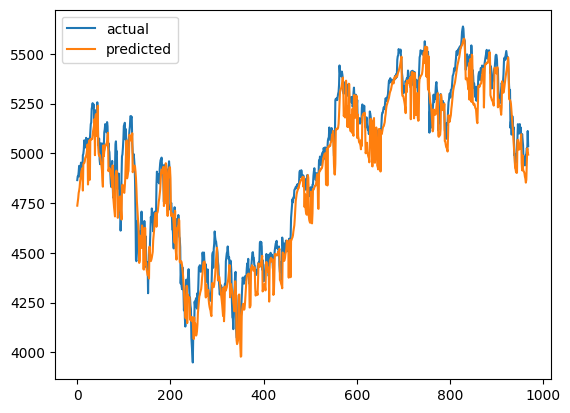

In [22]:
test.plot()

In [23]:
filename = 'model_pickle_cac40_lstm.sav'
pickle.dump(model, open(filename, 'wb'))